In [18]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression

import pandas_datareader as pdr
from datetime import datetime
import requests
from io import StringIO
import sklearn

from sklearn.datasets import load_boston


In [19]:
boston=load_boston()

In [20]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

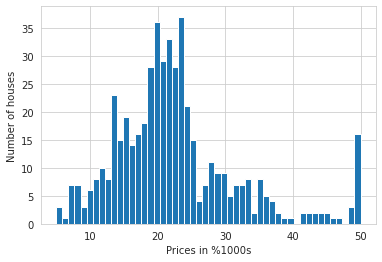

In [21]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in %1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'number of rooms')

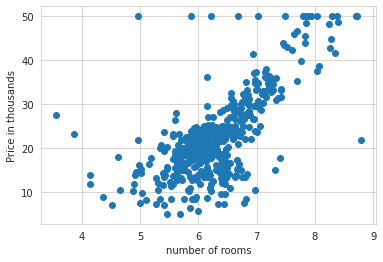

In [22]:
# scatter ( x , y), in this case, everythin in column 5
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in thousands')
plt.xlabel('number of rooms')

In [23]:
#we would have to fo this manually, but this example dataset is special

boston_df= DataFrame(boston.data)
boston_df.columns=boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
boston_df['Price']= boston.target

In [25]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


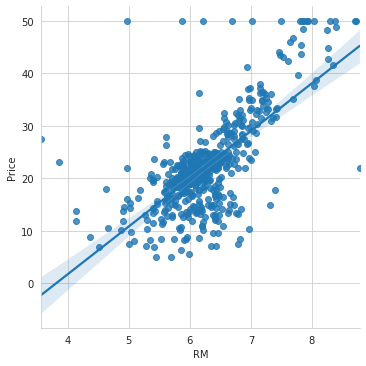

In [26]:
sns.lmplot(x='RM',y='Price',data=boston_df)

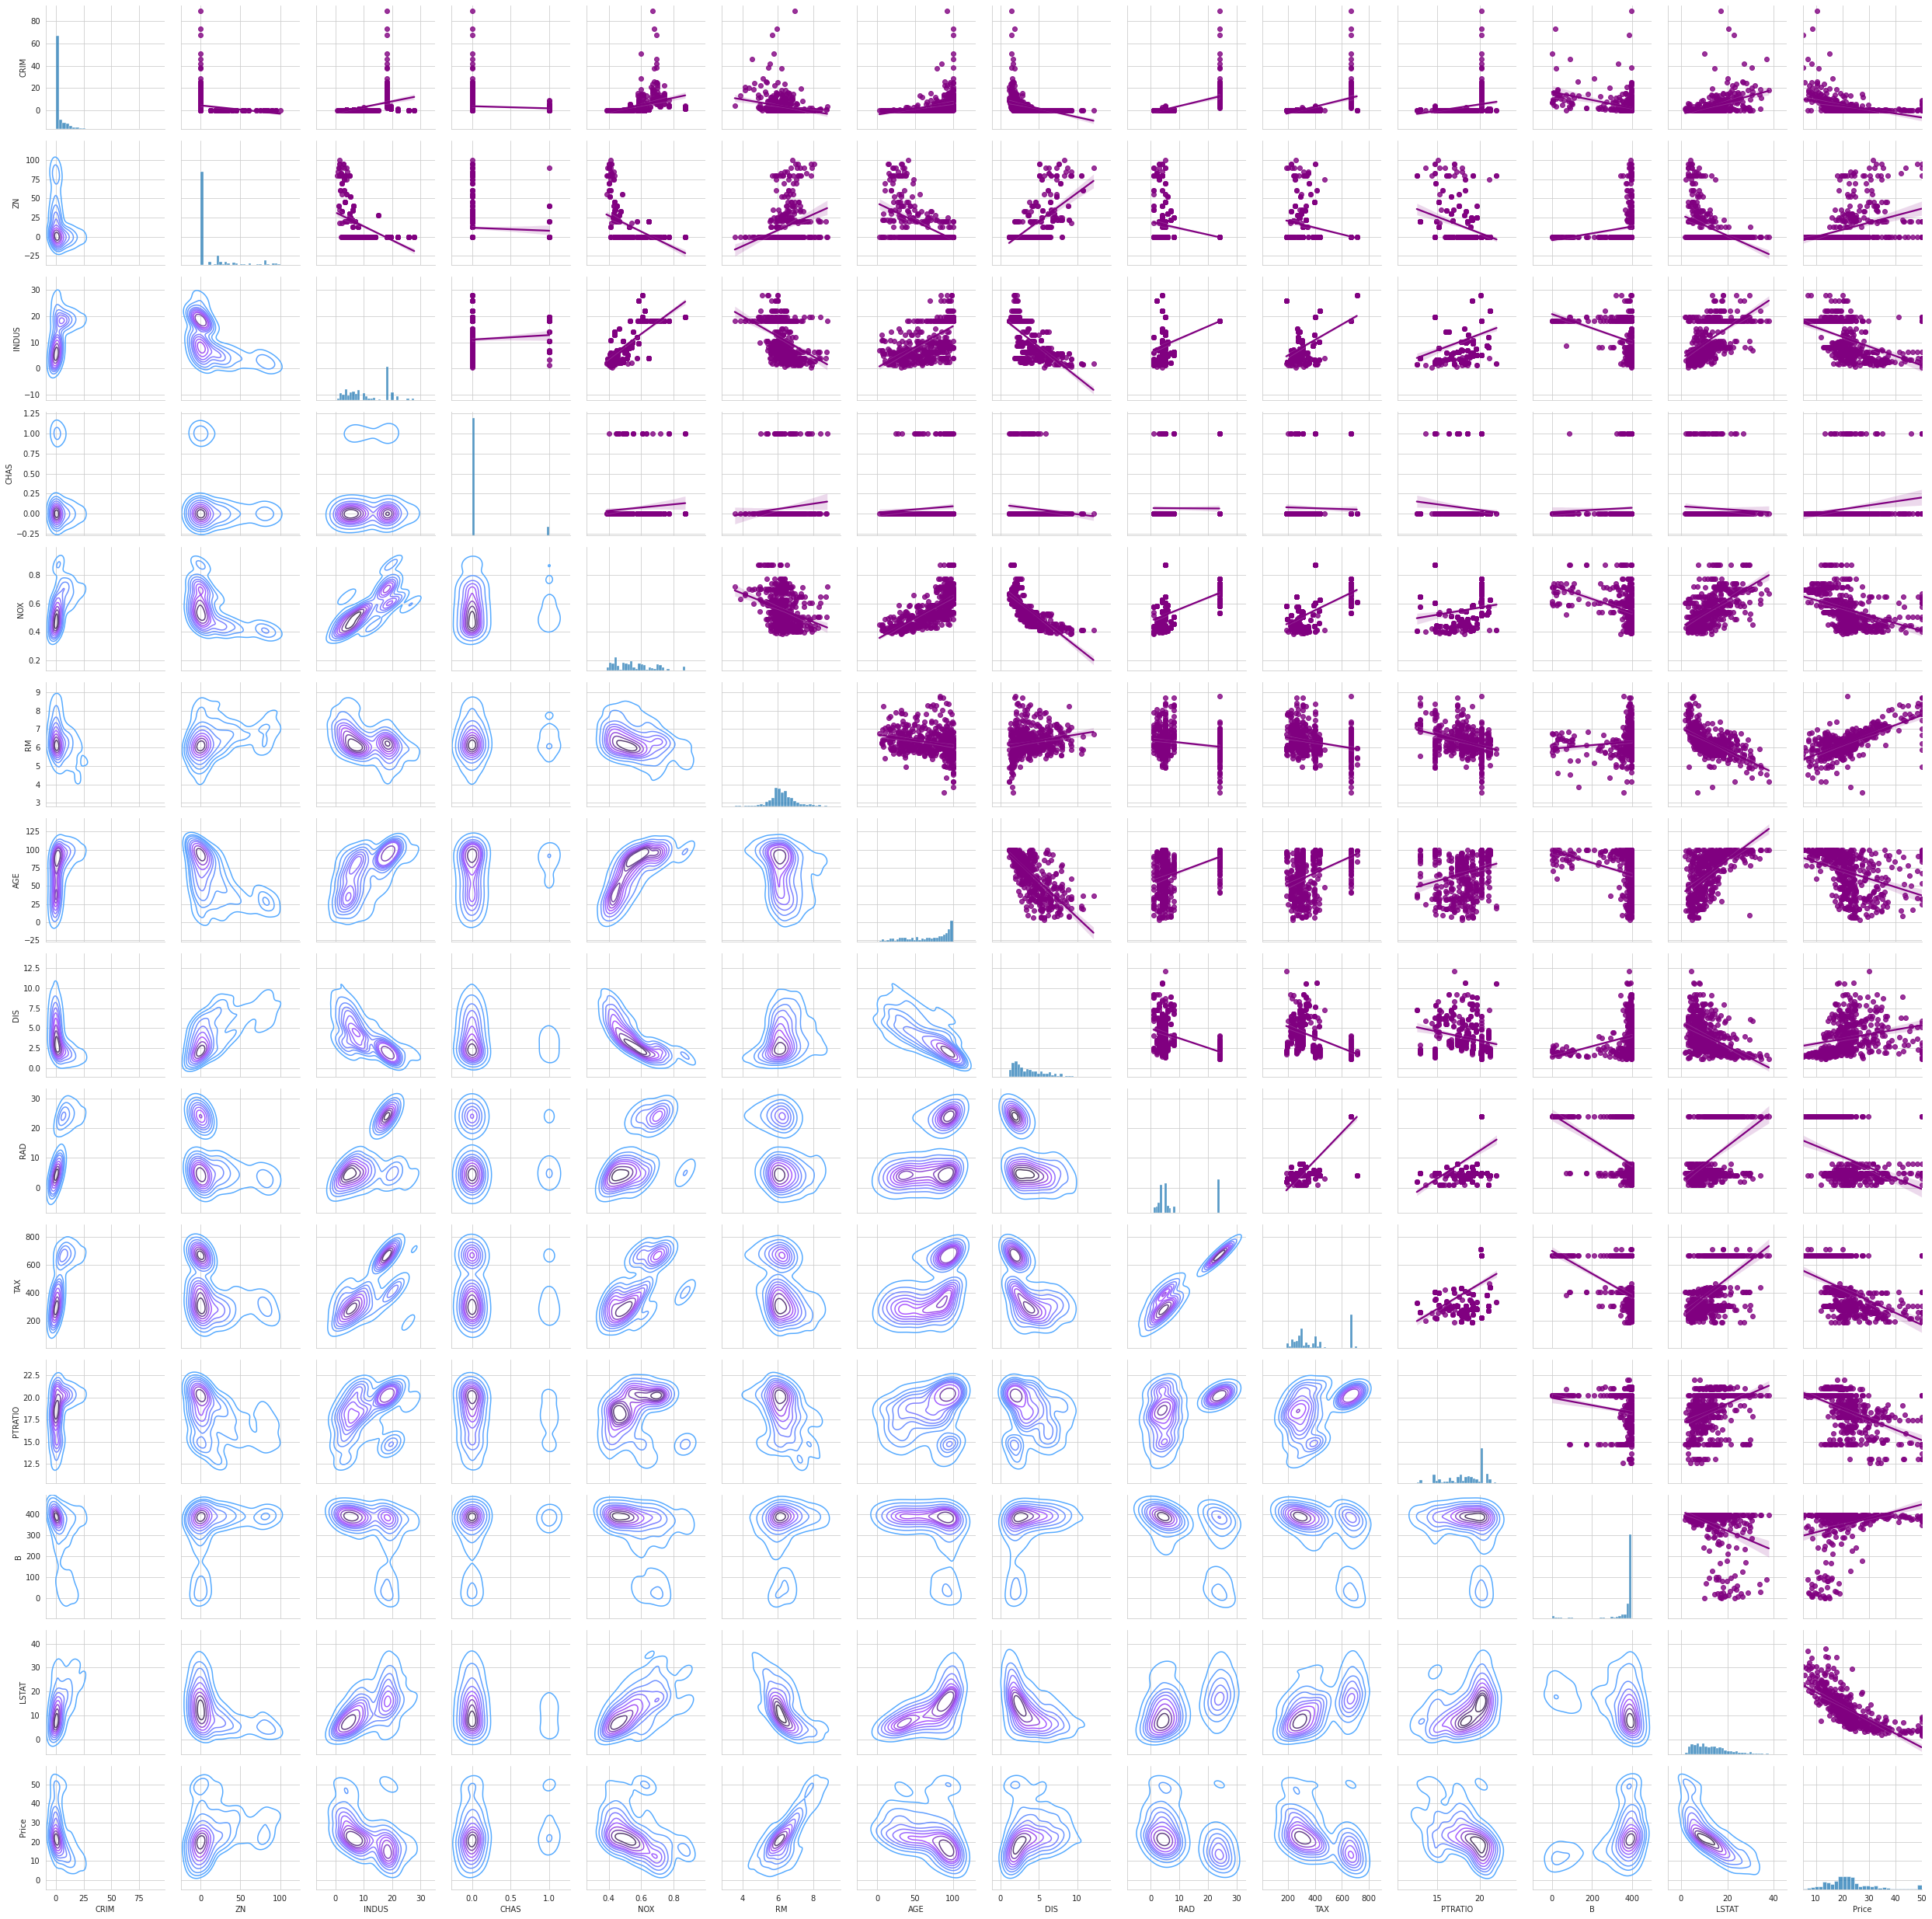

In [30]:

boston_fig = sns.PairGrid(boston_df.dropna())
boston_fig.map_upper(sns.regplot,color='purple')
boston_fig.map_lower(sns.kdeplot,cmap='cool_d')
boston_fig.map_diag(sns.histplot,bins=30)

In [31]:
#needs the x axis to be vertically stacked for numpy
#needs to be converted to arrays for numpy, it isnt good at y=mx+b, got to be converted
#array in the form of x 1
x=boston_df.RM
x=np.vstack([boston_df.RM, np.ones(len(x))]).T

y=boston_df.Price
x.shape


(506, 2)

In [33]:
m , b = np.linalg.lstsq(x,y, rcond=None)[0]

In [34]:
m

9.102108981180315

In [35]:
b

-34.67062077643858

Text(4.1, 42, 'y=9.10x + -34.67')

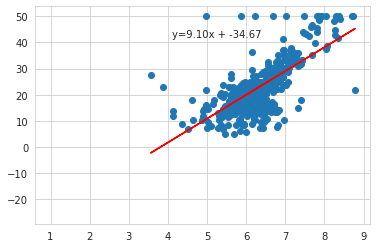

In [36]:
plt.plot(boston_df.RM,boston_df.Price,'o')

plt.plot(x,m*x+b,'r')
plt.text(4.1,42,'y={0:.2f}x + {1:.2f}'.format(m,b))

In [37]:
x=np.vstack([boston_df.RM, np.ones(len(x))]).T

y=boston_df.Price


result=np.linalg.lstsq(x,y,rcond=None)
#error is stored at index 1, see docs
error_total=result[1]
rmse=np.sqrt(error_total/len(x))
print('root mean square error was %.2f' %rmse)

root mean square error was 6.60


Text(4.1, 37, 'RMSE=6.60')

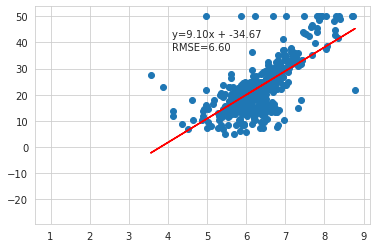

In [38]:
plt.plot(boston_df.RM,boston_df.Price,'o')

plt.plot(x,m*x+b,'r')
plt.text(4.1,42,'y={0:.2f}x + {1:.2f}'.format(m,b))
plt.text(4.1,37,'RMSE=%.2f' %rmse)
#house price will be within 2*rmse, which is ~the stddev, of the line

In [39]:
#sci kit learn multiple regression, got to make a linear regression object first
#theres an order to this, first make the regression object, then fit, then predict, then score for the r2
lreg=LinearRegression()

In [40]:
#to drop a column, you need the one
x_multi=boston_df.drop('Price',1)
y_target=boston_df.Price

In [41]:
lreg.fit(x_multi,y_target)
#basically, a 13 factor polynomial curve, taking into account all 3 variables in the dataset

LinearRegression()

In [42]:
print('the estimated intercept coefficient is %.2f' %lreg.intercept_)
print('the number of coefficients used was %d'%len(lreg.coef_))

the estimated intercept coefficient is 36.46
the number of coefficients used was 13


In [43]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate']= Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [45]:
#model selection, not cross validation as in the video. I thionk this should be done with the x_multi
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,boston_df.Price)

In [46]:
print (x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [47]:
x_train

array([[5.966, 1.   ],
       [7.274, 1.   ],
       [6.312, 1.   ],
       [6.516, 1.   ],
       [4.963, 1.   ],
       [6.398, 1.   ],
       [6.727, 1.   ],
       [6.216, 1.   ],
       [5.304, 1.   ],
       [6.546, 1.   ],
       [5.713, 1.   ],
       [5.454, 1.   ],
       [8.725, 1.   ],
       [5.976, 1.   ],
       [6.242, 1.   ],
       [7.875, 1.   ],
       [5.019, 1.   ],
       [7.206, 1.   ],
       [5.012, 1.   ],
       [6.482, 1.   ],
       [6.326, 1.   ],
       [5.803, 1.   ],
       [6.375, 1.   ],
       [6.115, 1.   ],
       [6.976, 1.   ],
       [6.101, 1.   ],
       [6.29 , 1.   ],
       [6.019, 1.   ],
       [6.565, 1.   ],
       [6.442, 1.   ],
       [4.973, 1.   ],
       [5.468, 1.   ],
       [7.358, 1.   ],
       [6.297, 1.   ],
       [6.426, 1.   ],
       [5.933, 1.   ],
       [6.415, 1.   ],
       [6.696, 1.   ],
       [7.327, 1.   ],
       [6.511, 1.   ],
       [6.461, 1.   ],
       [5.895, 1.   ],
       [6.431, 1.   ],
       [5.7

In [48]:
#got to make a linear regression object first, then fit, then predict, then score for the r2
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [49]:
pred_train=lreg.predict(x_train)

In [50]:
pred_test=lreg.predict(x_test)

In [51]:
print ('fit a model x_train and calculate the MSE with y_train: %2f'% np.mean((y_train-pred_train)**2))
print ('fit a model x_train and calculate MSE with x_test and y_test: %2f' %np.mean((y_test-pred_test)**2))

fit a model x_train and calculate the MSE with y_train: 48.616974
fit a model x_train and calculate MSE with x_test and y_test: 28.844943


Text(0.5, 1.0, 'This is a single linear regression')

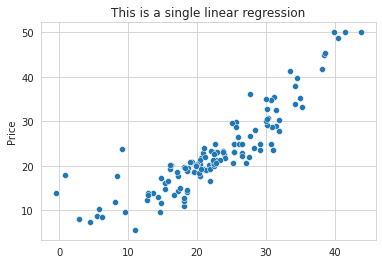

In [66]:
sns.scatterplot(x=pred_test,y=y_test)
ax=plt.gca()
ax.set_title('This is a single linear regression')

Text(0.5, 1.0, 'Residual Plots of a single Linear Regression')

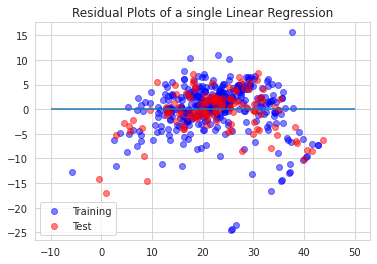

In [67]:
train=plt.scatter(x=pred_train,y=(pred_train-y_train),c='b', alpha=0.5)
test=plt.scatter(x=pred_test,y=(pred_test-y_test), c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots of a single Linear Regression')

In [54]:
#model selection, not cross validation as in the video. I thionk this should be done with the x_multi
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x_multi,boston_df.Price)

In [55]:
print (x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [68]:
#got to make a linear regression object first, then fit, then predict, then score for the r2
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [69]:
pred_train=lreg.predict(x_train)

In [70]:
pred_test=lreg.predict(x_test)

In [71]:
print ('fit a model x_train and calculate the MSE with y_train: %2f'% np.mean((y_train-pred_train)**2))
print ('fit a model x_train and calculate MSE with x_test and y_test: %2f' %np.mean((y_test-pred_test)**2))

fit a model x_train and calculate the MSE with y_train: 23.411230
fit a model x_train and calculate MSE with x_test and y_test: 18.185059


Text(0.5, 1.0, 'This is a multiple regression of the same data')

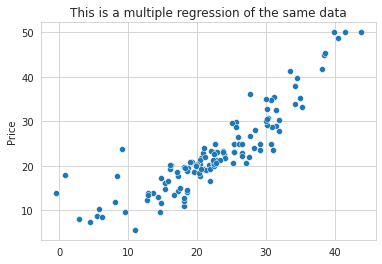

In [72]:
sns.scatterplot(x=pred_test,y=y_test)
ax=plt.gca()
ax.set_title('This is a multiple regression of the same data')


I was right, should have used x_multi


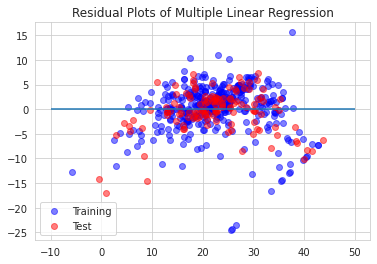

In [73]:
train=plt.scatter(x=pred_train,y=(pred_train-y_train),c='b', alpha=0.5)
test=plt.scatter(x=pred_test,y=(pred_test-y_test), c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots of Multiple Linear Regression')
print('I was right, should have used x_multi')